In [3]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Train Data
trainDf =  pd.read_csv('Train.csv', names=["id","text","emotion","intensity"], engine='python')
trainDf=trainDf.drop("id",axis=1)
print("Initial Shape of train data:",trainDf.shape)


Initial Shape of train data: (3317, 3)


In [5]:
AngerDf = trainDf[trainDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>=0.4]
AngerDf["emotion"] = 0

FearDf = trainDf[trainDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = trainDf[trainDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.4]
JoyDf["emotion"] = 2

SadDf = trainDf[trainDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.4]
SadDf["emotion"] = 3

trainDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of train dataset:",trainDf.shape)
print(trainDf.head(10))
print()

Final shape of train dataset: (2394, 3)
                                                text  intensity  emotion
0  How the fu*k! Who the heck! moved my fridge!.....      0.938        0
1  So my Indian Uber driver just called someone t...      0.896        0
2  @DPD_UK I asked for my parcel to be delivered ...      0.896        0
3  so ef whichever butt wipe pulled the fire alar...      0.896        0
4  Don't join @BTCare they put the phone down on ...      0.896        0
5                                My blood is boiling      0.875        0
6  When you've still got a whole season of Wentwo...      0.875        0
7  @bt_uk why does tracking show my equipment del...      0.875        0
8  @TeamShanny legit why i am so furious with him...      0.875        0
9  How is it suppose to work if you do that? Wtf ...      0.875        0



In [7]:
#Cross Validation Data
crossValDf =  pd.read_csv('CrossValidate.csv', names=["id","text","emotion","intensity"], engine='python')
crossValDf=crossValDf.drop("id",axis=1)
print("Initial Shape of CV data:",crossValDf.shape)


AngerDf = crossValDf[crossValDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>0.4]
AngerDf["emotion"] = 0

FearDf = crossValDf[crossValDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = crossValDf[crossValDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.4]
JoyDf["emotion"] = 2

SadDf = crossValDf[crossValDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.4]
SadDf["emotion"] = 3

crossValDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of CV data:",crossValDf.shape)
print(crossValDf.head(10))
print()

Initial Shape of CV data: (347, 3)
Final shape of CV data: (228, 3)
                                                text  intensity  emotion
0  @ZubairSabirPTI  pls dont insult the word 'Molna'      0.479        0
1  @ArcticFantasy I would have almost took offens...      0.458        0
2  @IllinoisLoyalty that Rutgers game was an abom...      0.562        0
3  @CozanGaming that's what lisa asked before she...      0.500        0
4  Sometimes I get mad over something so minuscul...      0.708        0
5  Sometimes I get mad over something so minuscul...      0.646        0
6  My eyes have been dilated. I hate the world ri...      0.812        0
7  @huwellwell One chosen by the CLP members! MP ...      0.682        0
8  @huwellwell One chosen by the CLP members! MP ...      0.438        0
9  @Yoshi_OnoChin can you please not have Canadia...      0.646        0



In [8]:
#Test Data
testDf =  pd.read_csv('Test.csv', names=["id","text","emotion","intensity"], engine='python')
testDf=testDf.drop("id",axis=1)
print("Initial Shape of Test data:",testDf.shape)


AngerDf = testDf[testDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>=0.4]
AngerDf["emotion"] = 0

FearDf = testDf[testDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = testDf[testDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.4]
JoyDf["emotion"] = 2

SadDf = testDf[testDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.4]
SadDf["emotion"] = 3

testDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of Test data:",testDf.shape)
print(testDf.head(10))

Initial Shape of Test data: (1454, 3)
Final shape of Test data: (995, 3)
                                                text  intensity  emotion
0  This game has pissed me off more than any othe...      0.898        0
1  @moocowward @mrsajhargreaves @Melly77 @GaryBar...      0.646        0
2  @moocowward @mrsajhargreaves @Melly77 @GaryBar...      0.583        0
3  @virginmedia I've been disconnected whilst on ...      0.625        0
4       @shae_caitlin ur road rage gives me anxiety.      0.438        0
5            @eMilsOnWheels I'm furious ðŸ˜©ðŸ˜©ðŸ˜©      0.708        0
6  They gonna give this KKk police bitch the mini...      0.877        0
7  They gonna give this KKk police bitch the mini...      0.708        0
8                I just got murdered in madden. ðŸ¤•      0.417        0
9  new madden 16 video was gonna be up but xbox i...      0.667        0


In [9]:
data_train= trainDf.drop(["intensity"],axis=1)
data_cv   = crossValDf.drop(["intensity"],axis=1)
data_test = testDf.drop(["intensity"],axis=1)

In [10]:
trainDf.head(2)

,text,intensity,emotion
0,How the fu*k! Who the heck! moved my fridge!.....,0.938,0
1,So my Indian Uber driver just called someone t...,0.896,0


# Text Cleaning

In [11]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

#Get set of english stop words and prepare stemmer
#Stop words for bag of words are different because we will use bigrams
stop=set(stopwords.words("english"))
stop_bow = set(stopwords.words("english"))
stop_bow.discard("not")
stop_bow.discard("no")
sno = nltk.stem.SnowballStemmer("english")

#Train data cleaning
train_text=data_train["text"]
cleaned_text_bow=[]
cleaned_text=[]
for line in train_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing # and * with a ""
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)

    #Conversion of line to array of words for word2vec
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
        if(word not in stop_bow):
            word = sno.stem(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_train_bow = pd.DataFrame(data=cleaned_text_bow,columns=["text"])
data_train_bow["emotion"] = data_train["emotion"]
data_train["text"]=cleaned_text
print(data_train.head(10))
print()
print(data_train_bow.head(10))
print()

#Cross Validate data cleaning
cv_text=data_cv["text"][0:]
cleaned_text=[]
cleaned_text_bow=[]
for line in cv_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing # and * with "" 
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)
    
    #Conversion of line to array of words
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_cv_bow = pd.DataFrame(data=cleaned_text_bow, columns=["text"])
data_cv_bow["emotion"]=data_cv["emotion"]
data_cv["text"]=cleaned_text
print(data_cv.head(10))
print()
print(data_cv_bow.head(10))
print()

#Test data cleaning
test_text=data_test["text"][0:]
cleaned_text=[]
cleaned_text_bow=[]
for line in test_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing hash and * with ""
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)
    
    #Conversion of line to array of words
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_test_bow = pd.DataFrame(data=cleaned_text_bow, columns=["text"])
data_test_bow["emotion"]=data_test["emotion"]
data_test["text"]=cleaned_text
print(data_test.head(10))
print(data_test_bow.head(10))

[nltk_data] Downloading package stopwords to /Users/klrao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  emotion
0  [fuk, heck, move, fridg, knock, landlord, door...        0
1  [indian, uber, driver, call, someon, n, word, ...        0
2  [ask, parcel, deliv, pick, store, address, fum...        0
3  [ef, whichev, butt, wipe, pull, fire, alarm, d...        0
4  [join, btcare, put, phone, talk, rude, take, m...        0
5                                      [blood, boil]        0
6  [still, got, whole, season, wentworth, watch, ...        0
7  [track, show, equip, deliv, servic, sudden, de...        0
8               [legit, furious, peopl, fuck, idiot]        0
9             [suppos, work, wtf, dude, thank, piss]        0

                                                text  emotion
0   fuk heck move fridg knock landlord door angri...        0
1   indian uber driver call someon n word move ve...        0
2   ask parcel deliv pick store not address fume ...        0
3   ef whichev butt wipe pull fire alarm davi bc ...        0
4   joi

# Text Vectorization(Word2Vec)

In [36]:
data_train.emotion.unique(),data_train.shape,len(list_of_sent)

(array([0, 1, 2, 3]), (2394, 2), 2394)

In [22]:
?gensim.models.Word2Vec

In [34]:
w2v_model.wv.vectors.shape

(912, 100)

In [38]:
model = gensim.models.Word2Vec()
model.build_vocab(list_of_sent, progress_per=200000)

In [42]:
from time import time
t = time()

model.train(list_of_sent, total_examples=model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.01 mins


In [43]:
model.wv.vectors.shape

(912, 100)

In [44]:
import gensim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

#Train on text data
list_of_sent = data_train["text"]
w2v_model=gensim.models.Word2Vec(list_of_sent)
w2v_words=list(w2v_model.wv.key_to_index.keys())
len(w2v_words)

912

In [45]:
w2v_words

['like',
 'get',
 'n',
 'amp',
 'make',
 'watch',
 'live',
 'feel',
 'sad',
 'day',
 'go',
 'one',
 'peopl',
 'time',
 'terror',
 'love',
 'know',
 'happi',
 'depress',
 'think',
 'u',
 'need',
 'still',
 'good',
 'today',
 'let',
 'amaz',
 'want',
 'look',
 'fuck',
 'smile',
 'would',
 'say',
 'right',
 'see',
 'lost',
 'got',
 'music',
 'even',
 'back',
 'never',
 'work',
 'broadcast',
 'alway',
 'ly',
 'realli',
 'rage',
 'someon',
 'life',
 'start',
 'cheer',
 'angri',
 'bad',
 'way',
 'ever',
 'much',
 'come',
 'play',
 'im',
 'anger',
 'offend',
 'fear',
 'anxieti',
 'man',
 'us',
 'thing',
 'nervous',
 'take',
 'guy',
 'thank',
 'tri',
 'afraid',
 'talk',
 'stop',
 'nightmar',
 'week',
 'first',
 'panic',
 'give',
 'hilari',
 'tell',
 'black',
 'year',
 'bitter',
 'shock',
 'wish',
 'use',
 'fume',
 'face',
 'hope',
 'world',
 'trump',
 'dread',
 'someth',
 'great',
 'help',
 'wait',
 'call',
 'lol',
 'could',
 'despair',
 'worst',
 'aw',
 'said',
 'everi',
 'best',
 'cri',
 'pe

In [29]:
?w2v_model.wv

In [26]:
list_of_sent

0       [fuk, heck, move, fridg, knock, landlord, door...
1       [indian, uber, driver, call, someon, n, word, ...
2       [ask, parcel, deliv, pick, store, address, fum...
3       [ef, whichev, butt, wipe, pull, fire, alarm, d...
4       [join, btcare, put, phone, talk, rude, take, m...
                              ...                        
2389                                  [lost, wallet, lol]
2390    [kali, kitten, ask, frown, curl, fair, skin, f...
2391    [citizenmeh, feel, strong, need, work, togeth,...
2392    [name, chang, uncl, remus, lewi, foh, theydont...
2393    [sister, canadian, player, someth, shadi, jona...
Name: text, Length: 2394, dtype: object

In [46]:
#Vectorize text data
listof_sent_vec=[]
#tqdm is for improving speed and making progressbar
for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)

100%|██████████| 2394/2394 [00:00<00:00, 7058.72it/s]


In [47]:
Label = data_train["emotion"]
list_col=tuple(range(100))
Scaler = StandardScaler()
train_vec = Scaler.fit_transform(listof_sent_vec)
W2v_data_train=pd.DataFrame(data=train_vec, columns=list_col)
W2v_data_train["emotion"] = Label
print(W2v_data_train.head(10))
print(W2v_data_train.shape)

          0         1         2         3         4         5         6  \
0  1.330578 -0.873543 -0.550782  0.054974 -0.575668  0.983180 -0.564252   
1  0.035689 -0.131624 -0.063240 -0.561253  0.325611  0.106404 -0.099075   
2  1.229074 -1.466009 -1.345805  1.471807 -1.080370  1.428172 -0.734245   
3  1.111164 -1.099787 -1.237507  0.833129 -1.010877  1.191591 -0.511598   
4  0.614953 -0.498325 -0.772645 -0.105440 -0.202622  0.475751 -0.135627   
5  1.732102 -1.187701 -1.843193  1.467966 -1.244349  1.568976 -1.651373   
6 -0.903821  0.742877  0.578364 -0.185556  0.810416 -0.658824  0.171234   
7  0.372012 -0.607908 -0.479463  0.370684 -0.577381  0.661130 -0.353219   
8 -0.992736  0.750886  1.265948 -1.353592  1.456522 -0.762780  0.247203   
9  0.711959 -0.651567 -0.733576  0.297238 -0.805481  0.671931 -1.027159   

          7         8         9  ...        91        92        93        94  \
0 -0.835828  0.763366  0.897379  ... -1.134047  0.468880 -1.051332 -0.713897   
1  0.048599  0

In [50]:
#Vectorize Cross Validate
list_of_sent= data_cv["text"]
listof_sent_vec=[]

for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_cv["emotion"]
list_col=tuple(range(100))
cv_vec = Scaler.transform(listof_sent_vec)
W2v_data_cv=pd.DataFrame(data=cv_vec, columns=list_col)
W2v_data_cv["emotion"] = Label
print(W2v_data_cv.head(10))
print(W2v_data_cv.shape)


#test
list_of_sent= data_test["text"]
listof_sent_vec=[]

for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_test["emotion"]
list_col=tuple(range(100))
test_vec = Scaler.transform(listof_sent_vec)
W2v_data_test=pd.DataFrame(data=test_vec, columns=list_col)
W2v_data_test["emotion"] = Label
print(W2v_data_test.head(10))
print(W2v_data_test.shape)

100%|██████████| 995/995 [00:00<00:00, 7252.60it/s]


          0         1         2         3         4         5         6  \
0  1.143866 -1.645581 -1.357435  1.589385 -1.660743  1.557917  0.231176   
1  1.267412 -1.145740 -0.615261  0.115875 -1.128342  1.104433 -0.833753   
2  0.139174  0.005845 -0.027680 -0.500304 -0.023564 -0.140835 -0.177068   
3 -1.041522  0.738327  0.472206 -0.554715  1.037512 -0.884591 -0.197118   
4 -1.307958  1.256379  1.487962 -0.633277  1.259420 -1.196948  0.393164   
5 -1.297383  1.233379  1.528551 -0.612267  1.280060 -1.173765  0.506274   
6  0.215029  0.177346  0.021612  0.083633  0.048301 -0.004861 -0.243548   
7 -0.189866  0.401098  0.692912 -0.506450  0.773241 -0.323090 -0.153296   
8 -0.319594  0.620424  0.974728 -0.268547  0.944030 -0.605148  0.220004   
9  0.250033 -0.352301 -0.404035  0.479618 -0.302349  0.281867 -0.315863   

          7         8         9  ...        91        92        93        94  \
0 -1.472965  1.468755  1.368792  ... -1.761145 -0.409884 -0.369410 -1.530822   
1 -1.116144  1

In [51]:
X_train_w2v = W2v_data_train.drop("emotion",axis=1).to_numpy()
y_train_w2v = W2v_data_train["emotion"].to_numpy()

X_cv_w2v = W2v_data_cv.drop("emotion",axis=1).to_numpy()
y_cv_w2v = W2v_data_cv["emotion"].to_numpy()

X_test_w2v = W2v_data_test.drop("emotion",axis=1).to_numpy()
y_test_w2v = W2v_data_test["emotion"].to_numpy()

print("Final shape of Train X and y for word2vec:",X_train_w2v.shape,y_train_w2v.shape)
print("Final shape of CV X and y for word2vec:",X_cv_w2v.shape,y_cv_w2v.shape)
print("Final shape of Test X and y for word2vec:",X_test_w2v.shape,y_test_w2v.shape)

Final shape of Train X and y for word2vec: (2394, 100) (2394,)
Final shape of CV X and y for word2vec: (228, 100) (228,)
Final shape of Test X and y for word2vec: (995, 100) (995,)


# Text Vectorization(bag of words)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize

#Train bag of words
bow_model = CountVectorizer(ngram_range=(1,2))
bow_model.fit(data_train_bow["text"])

X_train_bow = normalize(bow_model.transform(data_train_bow["text"])).tocsr()
y_train_bow = data_train_bow["emotion"].to_numpy()

X_cv_bow = normalize(bow_model.transform(data_cv_bow["text"])).tocsr()
y_cv_bow = data_cv_bow["emotion"].to_numpy()

X_test_bow = normalize(bow_model.transform(data_test_bow["text"])).tocsr()
y_test_bow = data_test_bow["emotion"].to_numpy()

print("Final shape of Train X and y for bag of words:",X_train_bow.shape,y_train_bow.shape)
print("Final shape of CV X and y for bag of words:",X_cv_bow.shape,y_cv_bow.shape)
print("Final shape of Test X and y for bag of words:",X_test_bow.shape,y_test_bow.shape)

Final shape of Train X and y for bag of words: (2394, 20970) (2394,)
Final shape of CV X and y for bag of words: (228, 20970) (228,)
Final shape of Test X and y for bag of words: (995, 20970) (995,)


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def showCnfMat(y_true,y_pred):
    mat = confusion_matrix(y_true,y_pred)
    for arr in mat:
        print(" ".join(list(map(str, arr))))
        
def plotHyperparameterScores(values,scores,scoring="accuracy",parameter="Lamda"):
    if(scoring=="f1"):
        bestScore = min(scores)
    elif(scoring=="accuracy"):
        bestScore = max(scores)
    index = scores.index(bestScore)
    val = values[index]
    plt.plot(values,scores)
    plt.show()
    print(f"Best Score at {parameter}: {val}")
    return val

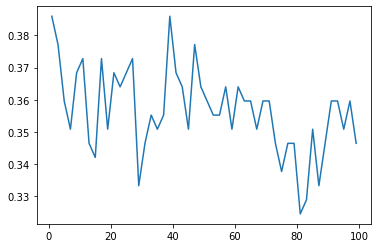

Best Score at K: 1
Final accuracy on train data: 0.9878863826232247
Final accuracy on CV data: 0.38596491228070173
Final accuracy on test data: 0.36482412060301506

Confusion Matrix on Test Data:
76 64 41 65
44 95 35 63
55 54 98 32
45 77 57 94


In [54]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1,100,2)
cv_scores= []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=2)
    knn.fit(X_train_w2v,y_train_w2v)
    y_pred = knn.predict(X_cv_w2v)
    cv_scores.append(accuracy_score(y_cv_w2v,y_pred))
    
optimal_k = plotHyperparameterScores(k_values,cv_scores,"accuracy","K")
knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights="uniform", p=2)
knn_model.fit(X_train_w2v, y_train_w2v)

y_predTrain= knn_model.predict(X_train_w2v)
y_predCV = knn_model.predict(X_cv_w2v)
y_predTest = knn_model.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_w2v,y_predTest)

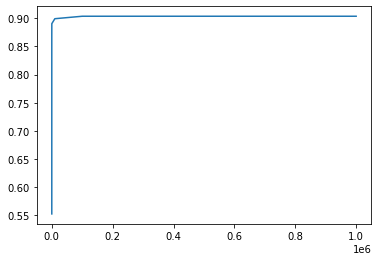

Best Score at C: 100000
Final accuracy on train data: 0.9899749373433584
Final accuracy on CV data: 0.9035087719298246
Final accuracy on test data: 0.821105527638191

Confusion Matrix on Test Data:
195 22 11 18
14 193 10 20
6 15 214 4
19 31 8 215


In [55]:
from sklearn.linear_model import LogisticRegression

C_values=[10**-1,10**0,10**1,10**2,10**4,10**5,10**6]
cv_scores = []

for C in C_values:
    LR = LogisticRegression(C=C, solver="liblinear",multi_class="auto")
    LR.fit(X_train_bow,y_train_bow)
    y_pred = LR.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_C = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
LR_model = LogisticRegression(C=optimal_C, solver="liblinear",multi_class="auto")
LR_model.fit(X_train_bow, y_train_bow)

y_predTrain= LR_model.predict(X_train_bow)
y_predCV = LR_model.predict(X_cv_bow)
y_predTest = LR_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

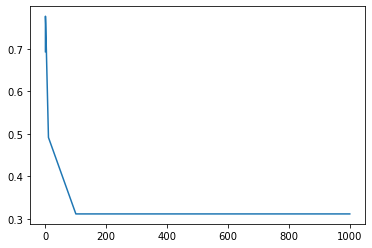

Best Score at alpha: 0.1
Final accuracy on train data: 0.9899749373433584
Final accuracy on CV data: 0.7763157894736842
Final accuracy on test data: 0.735678391959799

Confusion Matrix on Test Data:
191 35 7 13
22 193 8 14
11 31 186 11
27 70 14 162


In [56]:
from sklearn.naive_bayes import MultinomialNB

alpha_values=[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]
cv_scores = []

for alpha in alpha_values:
    NB = MultinomialNB(alpha=alpha)
    NB.fit(X_train_bow,y_train_bow)
    y_pred = NB.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_alpha = plotHyperparameterScores(alpha_values,cv_scores,"accuracy","alpha")
NB_model = MultinomialNB(alpha=optimal_alpha)
NB_model.fit(X_train_bow, y_train_bow)

y_predTrain= NB_model.predict(X_train_bow)
y_predCV = NB_model.predict(X_cv_bow)
y_predTest = NB_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

In [57]:
from sklearn.ensemble import RandomForestClassifier
   
RF_model = RandomForestClassifier(n_estimators=1000,max_depth=None)
RF_model.fit(X_train_w2v,y_train_w2v)

y_predTrain= RF_model.predict(X_train_w2v)
y_predCV = RF_model.predict(X_cv_w2v)
y_predTest = RF_model.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_w2v,y_predTest)

Final accuracy on train data: 0.9878863826232247
Final accuracy on CV data: 0.43859649122807015
Final accuracy on test data: 0.39899497487437185

Confusion Matrix on Test Data:
103 123 11 9
40 169 9 19
37 121 73 8
48 158 15 52


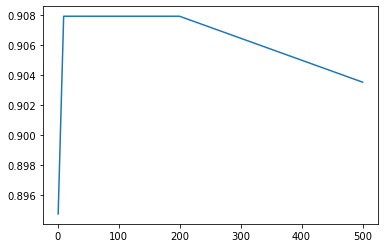

Best Score at C: 10
Final accuracy on train data: 0.9899749373433584
Final accuracy on CV data: 0.9078947368421053
Final accuracy on test data: 0.8251256281407036

Confusion Matrix on Test Data:
196 22 10 18
14 192 11 20
5 14 217 3
17 30 10 216


In [58]:
from sklearn.svm import LinearSVC

C_values=[10**0,10,20,50,80,10**2,120,200,500]
cv_scores = []

for C in C_values:
    SVM = LinearSVC(C = C, dual=False)
    SVM.fit(X_train_bow,y_train_bow)
    y_pred = SVM.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_C_SVM = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
SVM_model = LinearSVC(C = optimal_C_SVM, dual=False)
SVM_model.fit(X_train_bow, y_train_bow)

y_predTrain= SVM_model.predict(X_train_bow)
y_predCV = SVM_model.predict(X_cv_bow)
y_predTest = SVM_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

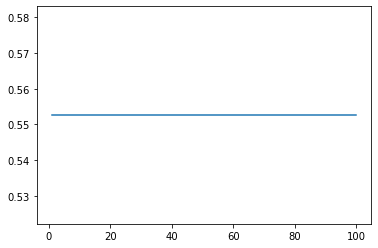

Best Score at C: 1
Final accuracy on train data: 0.6060985797827904
Final accuracy on CV data: 0.5526315789473685
Final accuracy on test data: 0.521608040201005

Confusion Matrix on Test Data:
120 62 35 29
40 151 28 18
23 57 140 19
56 73 36 108


In [59]:
C_values=[1,10,40,60,100]
cv_scores = []

for C in C_values:
    SVM = LinearSVC(C = C, dual=False)
    SVM.fit(X_train_w2v,y_train_w2v)
    y_pred = SVM.predict(X_cv_w2v)
    cv_scores.append(accuracy_score(y_cv_w2v,y_pred))
    
optimal_C_SVM = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
SVM_modelW2v = LinearSVC(C = optimal_C_SVM, dual=False)
SVM_modelW2v.fit(X_train_w2v, y_train_w2v)

y_predTrain= SVM_modelW2v.predict(X_train_w2v)
y_predCV = SVM_modelW2v.predict(X_cv_w2v)
y_predTest = SVM_modelW2v.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_w2v,y_predTest)

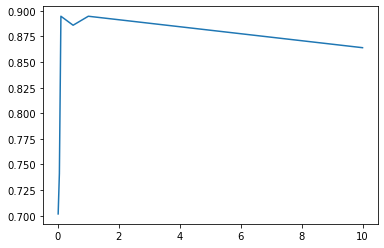

Best Score at C: 0.1
Final accuracy on train data: 0.9887218045112782
Final accuracy on CV data: 0.8947368421052632
Final accuracy on test data: 0.8030150753768844

Confusion Matrix on Test Data:
191 31 6 18
13 193 12 19
5 24 199 11
14 37 6 216


In [60]:
from mlxtend.classifier import StackingClassifier

LR = LogisticRegression(C=10**5, solver="liblinear", multi_class="auto")
SVM= LinearSVC(C=10, dual=False)
NB = MultinomialNB(alpha=0.1)


C = [10**-2,0.05,0.1,0.5,1,10**1]
cv_scores = []

for c in C:
    meta = LogisticRegression(C = c, solver="liblinear", multi_class="auto")
    S_clf = StackingClassifier(classifiers=[LR,SVM,NB], meta_classifier=meta)
    S_clf.fit(X_train_bow,y_train_bow)
    y_pred = S_clf.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow, y_pred))
    
optimal_C_sclf = plotHyperparameterScores(C,cv_scores,"accuracy","C")
meta = LogisticRegression(C=optimal_C_sclf,solver="liblinear",multi_class="auto")
Stack_model = StackingClassifier(classifiers=[LR,SVM,NB], meta_classifier=meta)
Stack_model.fit(X_train_bow, y_train_bow)

y_predTrain= Stack_model.predict(X_train_bow)
y_predCV = Stack_model.predict(X_cv_bow)
y_predTest = Stack_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

In [61]:
user_text = input()

tags = re.compile("^@[a-zA-Z_]*")
user_text = re.sub(tags," ",user_text)
hashtags = re.compile("#|\*")
user_text = re.sub(hashtags,"",user_text)
extraCharacters = re.compile("[^a-zA-Z]")
user_text = re.sub(extraCharacters," ",user_text)
    
filtered_text=""
for word in user_text.split():
    word=word.lower()
    if(word not in stop_bow):
        word = sno.stem(word)
        filtered_text+=" "+word

X = normalize(bow_model.transform([filtered_text])).tocsr()
Y = SVM_model.predict(X)
Y = Y[0]
if(Y==0):
    print("Anger")
elif(Y==1):
    print("Fear")
elif(Y==2):
    print("Joy")
else:
    print("Sadness")

1
Fear
